# **Data Visualization Notebook**

## Objectives

- Address business requiremenent 1:
    - The client is interested in conducting a study to visually differentiate a cherry leaf that is healthy from one that contains powdery mildew.

## Inputs

This notebook will use the following inputs:
- inputs\cherry-leaves\cherry-leaves\test
- inputs\cherry-leaves\cherry-leaves\train
- inputs\cherry-leaves\cherry-leaves\validation

## Outputs

This notebook will generate the following outputs:
- A pickle file storing image shape embeddings (image data stored as a numercal representation) 
- Plots that show the mean (average) image and variability of images for each label
- A plot to show the difference beween healthy leaves and mildewed leaves
- Code to address business requirement 1 and build an image montage

## Set the Data Visualisazation Directories

### Import the required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

### Set the working directory

Identify the current working directory

In [2]:
current_dir = os.getcwd()  
print(f"📂 Current Directory: {current_dir}")


📂 Current Directory: /workspaces/milestone-project-mildew-detection-in-cherry-leaves/jupyter_notebooks


Set a new working directory

In [ ]:
target_dir = "/workspaces/milestone-project-mildew-detection-in-cherry-leaves"  # Replace with your correct path
os.chdir(target_dir)
print(f"✅ Working Directory Set to:📂 {os.getcwd()}")

✅ Working Directory Set to: /workspaces/milestone-project-mildew-detection-in-cherry-leaves


Check the new working directory

In [4]:
current_dir = os.getcwd()
print(f"📂 Current Directory: {current_dir}")

📂 Current Directory: /workspaces/milestone-project-mildew-detection-in-cherry-leaves


### Set the input directories

Establish the train, test and validation directory paths

In [5]:

image_data = "inputs/cherry-leaves/cherry-leaves"
train_path = os.path.join(image_data, "train")
val_path = os.path.join(image_data, "validation")
test_path = os.path.join(image_data, "test")

print(f"📂 Train Path: {train_path}")
print(f"📂 Validation Path: {val_path}")
print(f"📂 Test Path: {test_path}")

📂 Train Path: inputs/cherry-leaves/cherry-leaves/train
📂 Validation Path: inputs/cherry-leaves/cherry-leaves/validation
📂 Test Path: inputs/cherry-leaves/cherry-leaves/test


### Confrim that the file paths look good

Select and display one random image from each train, test and validation folder to confirm that the file paths are correct.

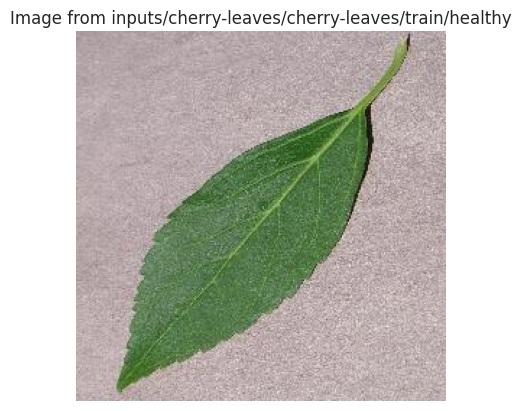

✅ Random train image: inputs/cherry-leaves/cherry-leaves/train/healthy/559408d6-2cd2-4fdb-9f45-fe0f7c23348c___JR_HL 9760_180deg.JPG


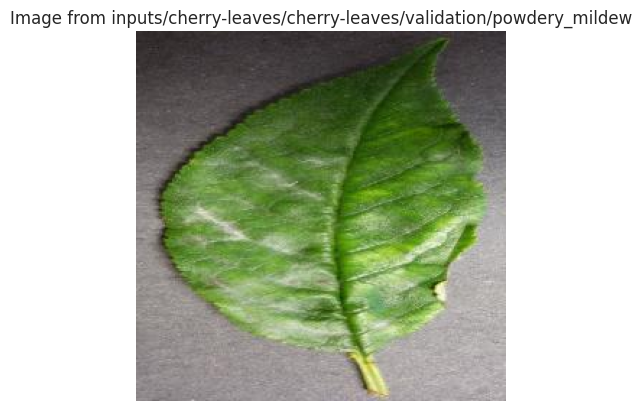

✅ Random validation image: inputs/cherry-leaves/cherry-leaves/validation/powdery_mildew/3b9e2d81-4659-4771-8210-eea9f4500b44___FREC_Pwd.M 4483.JPG


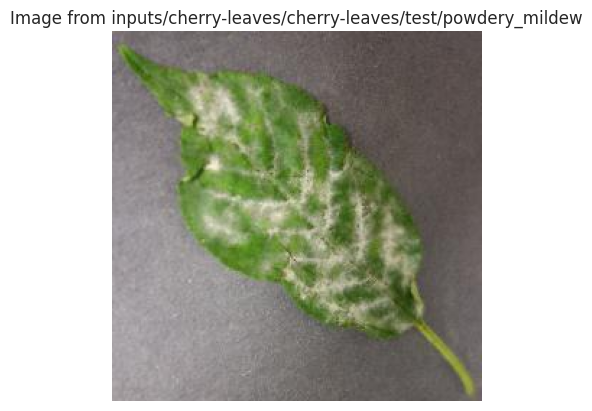

✅ Random test image: inputs/cherry-leaves/cherry-leaves/test/powdery_mildew/1ec4000c-0a5a-4a9c-8af8-986421967119___FREC_Pwd.M 4529.JPG


In [6]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define paths correctly
image_data = "inputs/cherry-leaves/cherry-leaves"
train_path = os.path.join(image_data, "train")
val_path = os.path.join(image_data, "validation")
test_path = os.path.join(image_data, "test")

# Function to find and display a random image from subfolders
def show_random_image(parent_folder):
    """
    Selects and displays a random image from a subfolder inside the given parent directory.

    Args:
        parent_folder (str): The path to the main dataset folder (e.g., train, validation, test).

    Returns:
        str or None: The full path to the randomly selected image, or None if no images are found.
    """

    # Ensure the parent folder exists
    if not os.path.exists(parent_folder):
        print(f"❌ Path does not exist: {parent_folder}")
        return None

    # Scan subdirectories ("healthy", "powdery_mildew")
    subfolders = [os.path.join(parent_folder, subdir) for subdir in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, subdir))]

    if not subfolders:
        print(f"⚠️ No subfolders found in: {parent_folder}")
        return None

    # Pick a random subfolder
    chosen_folder = random.choice(subfolders)

    # Find image files inside that subfolder
    images = [f for f in os.listdir(chosen_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.webp'))]

    if not images:
        print(f"⚠️ No images found in: {chosen_folder}")
        return None

    # Select a random image and display it
    image_path = os.path.join(chosen_folder, random.choice(images))
    image = Image.open(image_path)

    plt.imshow(image)
    plt.title(f"Image from {chosen_folder}")
    plt.axis("off")  # Hide axes for a cleaner look
    plt.show()

    return image_path  # Return path for confirmation

# Fetch and display random images from each dataset section
train_image = show_random_image(train_path)
print(f"✅ Random train image: {train_image}")
val_image = show_random_image(val_path)
print(f"✅ Random validation image: {val_image}")
test_image = show_random_image(test_path)
print(f"✅ Random test image: {test_image}")





Set the ouptut directory

In [ ]:
# Define the version of the output directory
version = 'v1'
current_dir = os.getcwd()  # Get the current working directory

# Construct the full path for the versioned output folder
file_path = os.path.join(current_dir, 'outputs', version)

# Check if the directory for this version already exists
if os.path.exists(file_path):
    print(f'⚠️ Old version "{version}" already exists. Create a new version.')
else:
    try:
        # Create the directory if it doesn't exist, `exist_ok=True` prevents errors if it already exists
        os.makedirs(file_path, exist_ok=True)
        print(f'✅ Created new directory:📂 {file_path}')
    except OSError as e:
        # Print an error message if directory creation fails
        print(f'❌ Error creating directory: {e}')

✅ Created new directory: /workspaces/milestone-project-mildew-detection-in-cherry-leaves/outputs/v1


### Set the label names

Labels should be 'healthy' and 'powdery_mildew'.

In [8]:
# Set the labels
labels = os.listdir(train_path)
print('🏷️ The labels for the images are', labels)

🏷️ The labels for the images are ['healthy', 'powdery_mildew']


## Data visualisation of image data

### Image Shape

Compute the average image size on train set. This code:

- Calculates the average height and width of each image
- Plots the dimensions of each image on a scatter plot
- Counts the number of images processed

Credit Code Institute's WalkthroughProject01 for calculation code.

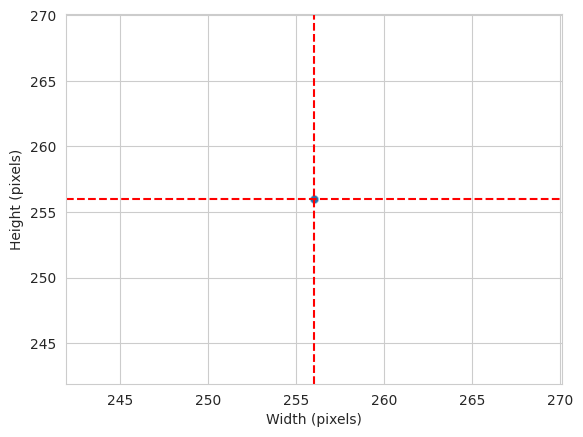

✅ Total images processed: 2944
✅ Width average: 256 
✅ Height average: 256


In [9]:
# Lists to store image dimensions
dim1, dim2 = [], []
image_count = 0  # Initialize a counter for the number of images processed

# Iterate through each label (subdirectories in the training set)
for label in labels:
    # Iterate through each image file within the label's directory
    for image_filename in os.listdir(train_path + '/' + label):
        # Read the image from the directory
        img = imread(train_path + '/' + label + '/' + image_filename)
        
        # Extract the dimensions of the image
        d1, d2, colors = img.shape  # d1 = height, d2 = width, colors = number of channels
        
        # Append the extracted dimensions to their respective lists
        dim1.append(d1)  # Stores image height values
        dim2.append(d2)  # Stores image width values
        
        # Increment the counter to track the number of images processed
        image_count += 1  

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create a figure and an axis for the plot
fig, axes = plt.subplots()

# Scatter plot to visualize width vs height of images
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)  # Semi-transparent points for better visibility

# Label the axes
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")

# Compute the mean (average) image dimensions
dim1_mean = int(np.array(dim1).mean())  # Average height
dim2_mean = int(np.array(dim2).mean())  # Average width

# Add dashed reference lines to indicate average dimensions
axes.axvline(x=dim1_mean, color='r', linestyle='--')  # Vertical line for avg width
axes.axhline(y=dim2_mean, color='r', linestyle='--')  # Horizontal line for avg height

# Display the scatter plot
plt.show()

# Print out the total number of images analyzed and the average dimensions
print(f"✅ Total images processed: {image_count}")
print(f"✅ Width average: {dim2_mean} \n✅ Height average: {dim1_mean}")

For training purposes we should define the image shape as the average widths and heights of all the images in the train set, along with the colour channels. The images in this set are all the same size (as seen from the plot above) but we will calcualte the mean of each neverthelss.

In [10]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(256, 256, 3)

...and then save the image shape embeddings in the 'outputs' folder.

In [11]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

print(f"📄['{file_path}']")


📄['/workspaces/milestone-project-mildew-detection-in-cherry-leaves/outputs/v1']


Confirm the image shape in the pickle file.

In [12]:
image_shape = joblib.load(f"{file_path}/image_shape.pkl")
print(f"Loaded image shape: {image_shape}")  # Should match expected dimensions

Loaded image shape: (256, 256, 3)


### Average and variability of images per label

#### Function to load images in an array (tensor)

In [13]:
import os
import numpy as np
import random
import joblib
from tensorflow.keras.preprocessing import image

def load_image_as_array(my_data_dir, image_shape_pkl=None, n_images_per_label=20):
    """
    Loads image data from a specified directory, normalizes pixel values, 
    and organizes them for studying variability across labels.

    Parameters:
    - my_data_dir (str): Path to the directory containing labeled subdirectories of images.
    - image_shape_pkl (str): Path to a pickle file containing the desired image shape (optional).
    - n_images_per_label (int): Maximum number of images to load per label category. Default is 20.

    Returns:
    - X (numpy.ndarray): Array of processed image data with original dimensions (unless resized).
    - y (numpy.ndarray): Array of numeric labels.
    """

    X, y = [] , []  # Lists to store image arrays and corresponding labels
    labels = sorted(os.listdir(my_data_dir))  # Sort labels for consistency in analysis

    # Create a mapping from label names to numeric indices
    label_map = {"healthy": 0, "powdery_mildew": 1}

    # Load image shape from pickle file if provided
    image_shape = None
    if image_shape_pkl:
        try:
            image_shape = joblib.load(image_shape_pkl)
            print(f"📄 Loaded image shape from pickle: {image_shape}")
        except Exception as e:
            print(f"⚠️ Error loading pickle file: {e}")

    for label in labels:
        counter = 0  # Tracks number of images processed per label
        label_path = os.path.join(my_data_dir, label)  # Construct full path to label directory
        
        # Iterate through image files within the label directory
        for image_filename in os.listdir(label_path):
            if counter >= n_images_per_label:
                break  # Stop collecting images once the limit is reached
            
            img_path = os.path.join(label_path, image_filename)  # Construct image path
            try:
                # Load image while keeping original dimensions unless resizing is needed
                img = image.load_img(img_path, target_size=image_shape[:2] if image_shape else None)  
                img_array = image.img_to_array(img) / 255.0  # Convert to array & normalize pixel values
                
                X.append(img_array)  # Store processed image data
                y.append(label_map[label])  # Assign corresponding label index
                
                counter += 1  # Increment counter for current label
                
            except Exception:
                pass  # Silently skip problematic files to ensure clean dataset
    
    # Convert lists to NumPy arrays for further statistical analysis
    X = np.array(X)
    y = np.array(y)

    # Shuffle dataset to avoid unintended biases in variability calculations
    combined = list(zip(X, y))
    random.shuffle(combined)
    X, y = zip(*combined)

    X, y = np.array(X), np.array(y)

    # Print dataset shape for reference when analyzing image variability across labels
    print(f"📄 Final shape: X={X.shape}, y={y.shape}")

    return X, y

2025-05-15 13:46:02.028431: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-15 13:46:02.059741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Load image shapes and labels in an array

This called function will return equal numbers of images for each label. To adjust the number of images, update the n_images_per_label value and run the cell.

In [14]:
X, y = load_image_as_array(my_data_dir=train_path, 
                           image_shape_pkl=f"{file_path}/image_shape.pkl", 
                           n_images_per_label=15)

📄 Loaded image shape from pickle: (256, 256, 3)
📄 Final shape: X=(30, 256, 256, 3), y=(30,)


#### Plot and save the mean and variability of images per label

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_mean_variability_per_labels(X, y, labels, figsize=(12, 5), save_image=False, file_path=None):
    """
    Plots the mean and variability of images for each label, using dynamic label mapping.

    Parameters:
    - X (numpy.ndarray): Array of image data.
    - y (numpy.ndarray): Array of labels.
    - labels (list): List of label names corresponding to directory names.
    - figsize (tuple): Size of the figure (default: (12, 5)).
    - save_image (bool): Whether to save the generated plot (default: False).
    - file_path (str): Directory path where images should be saved, required if save_image=True.

    Returns:
    - None: Displays or saves plots of average and variability images per label.
    """

    # Ensure file_path is provided if save_image is True
    if save_image and file_path is None:
        raise ValueError("⚠️ Please provide a valid file path for saving images.")

    # Create mappings between numeric labels and directory names
    label_map = {label: idx for idx, label in enumerate(labels)}
    reverse_label_map = {idx: label for label, idx in label_map.items()}  # For display purposes

    unique_labels = np.unique(y)  # Get unique numeric labels
    y = y.reshape(-1, 1)  # Reshape labels for masking consistency

    for label_to_display in unique_labels:
        sns.set_style("white")

        # Get label name dynamically
        label_name = reverse_label_map[label_to_display]

        # Create mask to filter images corresponding to the label
        boolean_mask = (y == label_to_display).reshape(-1)
        arr = X[boolean_mask]

        if arr.size == 0:
            print(f"⚠️ No images found for label '{label_name}', skipping...")
            continue

        # Compute the mean and standard deviation images
        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)

        # Print label details
        print(f"📄 Label '{label_name}': Image Shape = {avg_img.shape}")

        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        axes[0].set_title(f"Average Image - {label_name}")
        axes[0].imshow(avg_img, cmap='gray')

        axes[1].set_title(f"Variability Image - {label_name}")
        axes[1].imshow(std_img, cmap='gray')

        # Save or show the plot
        if save_image:
            save_path = f"{file_path}/avg_var_{label_name}.png"
            plt.savefig(save_path, bbox_inches='tight', dpi=150)
            print(f"✅ Saved plot at:📂 {save_path}")
        else:
            plt.tight_layout()
            plt.show()

        print("\n")

Call the function

📄 Label 'healthy': Image Shape = (256, 256, 3)
✅ Saved plot at:📂 /workspaces/milestone-project-mildew-detection-in-cherry-leaves/outputs/v1/avg_var_healthy.png


📄 Label 'powdery_mildew': Image Shape = (256, 256, 3)
✅ Saved plot at:📂 /workspaces/milestone-project-mildew-detection-in-cherry-leaves/outputs/v1/avg_var_powdery_mildew.png




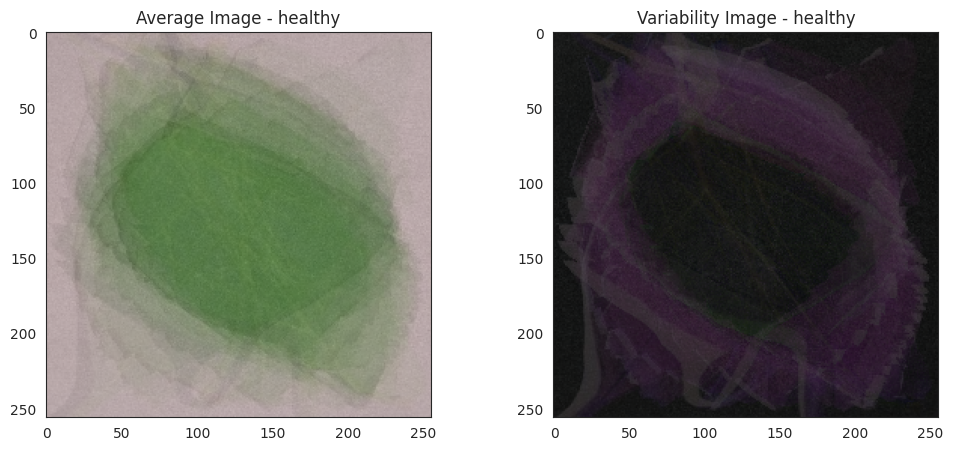

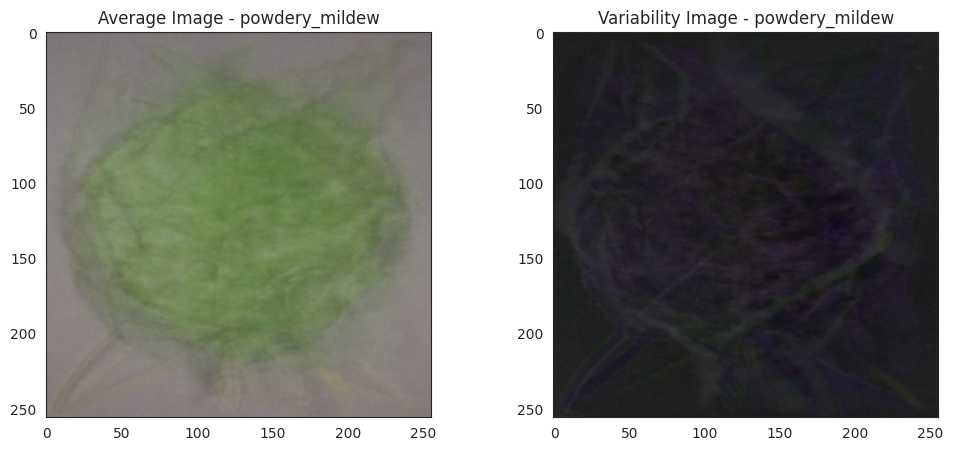

In [16]:
plot_mean_variability_per_labels(X=X, y=y, labels=labels, figsize=(12, 5), save_image=True, file_path=file_path)